# Week2授業前課題2 ダミーデータの作成
機械学習に関するプログラムの実験を行う上で、実データではないランダムなデータ（ダミーデータ）が欲しいということがあります。正規分布に従う乱数によるダミーデータの作成を通じてNumPyの使い方になれていきましょう。

## 【問題1】乱数の作成
平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。<br>
<br>
$$
\left[
\begin{array}{ccc}
  1.0 & 0.8\\
  0.8 & 1.0
\end{array}
\right]
$$

多次元の正規分布による乱数は`np.random.multivariate_normal()`を使うことで作成できます。<br>
<br>
作成したndarrayのshapeは(500, 2)になります。<br>

<br>

**《シード値について》**<br>
<br>
実行ごとに値が変わらないように、`np.random.seed()`により乱数のシード値を固定しておきましょう。今回シード値は0を使うことにします。


In [1]:
import numpy as np

MEAN = [-3,0]
COV = [[1.0,0.8],[0.8,1.0]]

np.random.seed(0)
x = np.random.multivariate_normal(MEAN, COV, 500)

print(x.shape)
print(x[0])

(500, 2)
[-4.80006782 -1.54698618]


## 【問題2】散布図による可視化
問題1で作成したデータ点を散布図により可視化してください。<br>
<br>
散布図はmatplotlibの`plt.scatter()`を使うことで描けます。

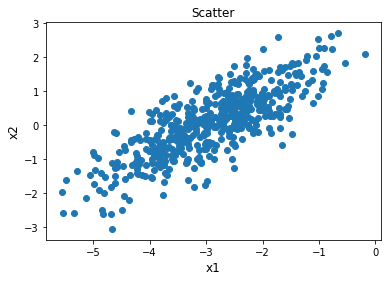

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("x1",size=12)
plt.ylabel("x2",size=12)
plt.title("Scatter")
plt.scatter(x[:,0], x[:,1])
plt.show()

## 【問題3】ヒストグラムによる可視化
問題1で作成したデータをヒストグラムにより可視化してください。<br>
ヒストグラムは`plt.hist()`を使うことで描けます。<br>

<br>

各次元ごとに作成し、2つのヒストグラムとしてください。
それぞれのヒストグラムの横軸の範囲は`plt.xlim()`を用いて揃えるようにしてください。<br>

<br>

**《作成例》** <br>
<br>

![histogram](https://t.gyazo.com/teams/diveintocode/bf3b6c3f9d3b1d437811db63a565d2d9.png)

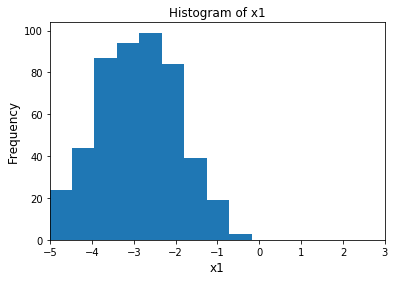

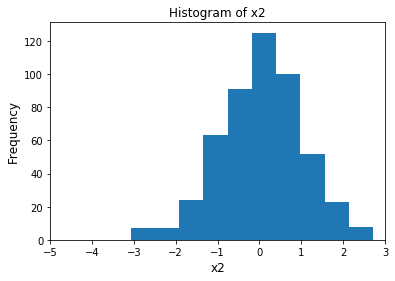

In [3]:
%matplotlib inline
plt.xlabel("x1", size=12)
plt.ylabel("Frequency", size=12)
plt.title("Histogram of x1")
plt.xlim(-5, 3)
plt.hist(x[:,0])
plt.show()

%matplotlib inline
plt.xlabel("x2", size=12)
plt.ylabel("Frequency", size=12)
plt.title("Histogram of x2")
plt.xlim(-5, 3)
plt.hist(x[:,1])
plt.show()

## 【問題4】データの追加
新たに平均が(0, -3)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。<br>

<br>
$$
\left[
\begin{array}{ccc}
  1.0 & 0.8\\
  0.8 & 1.0
\end{array}
\right]
$$
<br>
そして、問題1、4それぞれのデータをひとつの散布図として可視化してください。凡例として問題1のものは0、問題2のものは1を表示してください。<br>

<br>

**《作成例》**
![scatter](https://t.gyazo.com/teams/diveintocode/29840c67d7aabcd16c3dd5325819ec65.png)<br>

<br>

課題のはじめに紹介した図と同じものです。

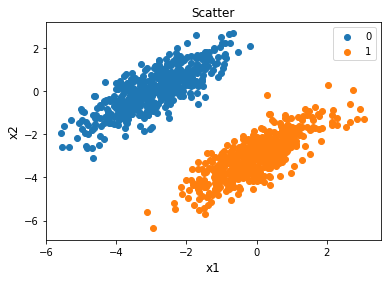

In [4]:
MEAN_NEW = [0, -3]
COV_NEW = [[1.0, 0.8], [0.8, 1.0]]

np.random.seed(1)
x_new = np.random.multivariate_normal(MEAN_NEW, COV_NEW, 500)

%matplotlib inline
plt.xlabel("x1",size=12)
plt.ylabel("x2",size=12)
plt.title("Scatter")
plt.scatter(x[:,0], x[:,1])
plt.scatter(x_new[:,0], x_new[:,1])
plt.legend((0,1))
plt.show()

## 【問題5】データの結合

データはまとめておいた方が後々扱いやすいです。問題1、4で作成したndarrayを**結合**し、(1000, 2)のndarrayとしてください。結合は`np.concatenate()`や`np.vstack()`を使うことで行えます。

In [5]:
x_join = np.concatenate((x, x_new))
print(x_join.shape)

(1000, 2)


## 【問題6】ラベル付け
ひとまとめになった1000個のデータそれぞれに対して、問題1、4どちらで作成したものなのかを示す**ラベル**付けを行ってください。問題1のものには0、問題4のものには1を対応させます。<br>
<br>
0と1を含むラベルの列を新たに追加し、(1000, 3)のndarrayを作成してください。<br>
<br>
機械学習に使用するデータセットはこのような形になっていることが多いです。<br>

<br>

**《作成例》**<br>
<br>
データが3個+3個の場合は以下のような(6, 3)のndarrayになります。<br>

![ラベル付き](https://t.gyazo.com/teams/diveintocode/a705e6e96f79e636934103088de0a0d0.png)

In [6]:
#問題１用ラベル（=0）のリスト作成
label_0 = np.zeros((500,1))
print(label_0.shape)
#問題４用ラベル（=1）のリスト作成
label_1 = np.ones((500,1))
print(label_1.shape)

#問題１＋４のラベルリストを結合
label = np.vstack((label_0, label_1))
print(label.shape)

#ラベルリストをデータリストに結合
x_labelled = np.hstack((x_join, label))
print(x_labelled)

(500, 1)
(500, 1)
(1000, 1)
[[-4.80006782 -1.54698618  0.        ]
 [-4.63714503 -0.21987973  0.        ]
 [-4.46267867 -2.08076347  0.        ]
 ...
 [-1.18810647 -4.26175222  1.        ]
 [ 2.18245179 -0.86158264  1.        ]
 [-0.2765906  -3.39483133  1.        ]]
